In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [151]:
# open several csv files: results/{default, cap, danish, decima}/tpch_{job_num}_{trace}/times_{0,1,2,3}.csv
# parse datetimes for the 'start_time' and 'end_time' columns
job_num = 25
trace = "PJM"

baseline_0 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
baseline_1 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
baseline_2 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
baseline_3 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

cap_0 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
cap_1 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
cap_2 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
cap_3 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

danish_0 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
danish_1 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
danish_2 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
danish_3 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

decima_0 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
decima_1 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
decima_2 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
decima_3 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

# drop rows that have no data
baseline_0 = baseline_0.dropna()
baseline_1 = baseline_1.dropna()
baseline_2 = baseline_2.dropna()
baseline_3 = baseline_3.dropna()

cap_0 = cap_0.dropna()
cap_1 = cap_1.dropna()
cap_2 = cap_2.dropna()
cap_3 = cap_3.dropna()

danish_0 = danish_0.dropna()
danish_1 = danish_1.dropna()
danish_2 = danish_2.dropna()
danish_3 = danish_3.dropna()

decima_0 = decima_0.dropna()
decima_1 = decima_1.dropna()
decima_2 = decima_2.dropna()
decima_3 = decima_3.dropna()

# view the head of first 4
print(baseline_0.head())
print(cap_0.head())
print(danish_0.head())
print(decima_0.head())

   job_id                 start_time                   end_time  \
0       0 2024-12-16 14:14:20.375150 2024-12-16 14:14:58.522756   
1       1 2024-12-16 14:14:54.637603 2024-12-16 14:15:30.346927   
2       2 2024-12-16 14:15:09.036669 2024-12-16 14:15:55.177951   
3       3 2024-12-16 14:15:32.817398 2024-12-16 14:34:58.320975   
4       4 2024-12-16 14:17:09.973518 2024-12-16 14:19:16.567824   

   carbon_footprint                                          executors  
0        101.402167  [('14:45', 'tpc-h-v3-0-0-spark-a3e60793cfd216f...  
1         56.126167  [('15:18', 'tpc-h-v3-0-0-spark-41281d93cfd29a2...  
2        161.086667  [('15:31', 'tpc-h-v3-0-0-spark-b8b67e93cfd2d04...  
3       8576.787667  [('16:01', 'tpc-h-v3-0-0-spark-53e0ce93cfd336b...  
4        696.393333  [('17:36', 'tpc-h-v3-0-0-spark-b914f093cfd4ae5...  
   job_id                 start_time                   end_time  \
0       0 2024-12-16 14:47:17.289174 2024-12-16 14:48:02.479492   
1       1 2024-12-16 14:4

In [152]:
# for each of the four dataframes, compute the total carbon footprint for the first 20 rows (sum of all the carbon footprints)
total_carbon_baseline = baseline_0['carbon_footprint'].head(100).sum()
total_carbon_cap = cap_0['carbon_footprint'].head(100).sum()
total_carbon_danish = danish_0['carbon_footprint'].head(100).sum()
total_carbon_decima = decima_0['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline:', total_carbon_baseline)
print('Total Carbon Footprint for cap:', total_carbon_cap)
print('Total Carbon Footprint for danish:', total_carbon_danish)
print('Total Carbon Footprint for decima:', total_carbon_decima)


Total Carbon Footprint for baseline: 35640.8248333332
Total Carbon Footprint for cap: 25245.81933333331
Total Carbon Footprint for danish: 26005.370333333307
Total Carbon Footprint for decima: 35947.660333333275


In [153]:
# do the same thing for the _1 files
total_carbon_baseline_1 = baseline_1['carbon_footprint'].head(100).sum()
total_carbon_cap_1 = cap_1['carbon_footprint'].head(100).sum()
total_carbon_danish_1 = danish_1['carbon_footprint'].head(100).sum()
total_carbon_decima_1 = decima_1['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_1:', total_carbon_baseline_1)
print('Total Carbon Footprint for cap_1:', total_carbon_cap_1)
print('Total Carbon Footprint for danish_1:', total_carbon_danish_1)
print('Total Carbon Footprint for decima_1:', total_carbon_decima_1)

Total Carbon Footprint for baseline_1: 27655.70483333333
Total Carbon Footprint for cap_1: 21321.45549999999
Total Carbon Footprint for danish_1: 29454.20033333334
Total Carbon Footprint for decima_1: 21226.1793333334


In [154]:
# and the same for the _2 files
total_carbon_baseline_2 = baseline_2['carbon_footprint'].head(100).sum()
total_carbon_cap_2 = cap_2['carbon_footprint'].head(100).sum()
total_carbon_danish_2 = danish_2['carbon_footprint'].head(100).sum()
total_carbon_decima_2 = decima_2['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_2:', total_carbon_baseline_2)
print('Total Carbon Footprint for cap_2:', total_carbon_cap_2)
print('Total Carbon Footprint for danish_2:', total_carbon_danish_2)
print('Total Carbon Footprint for decima_2:', total_carbon_decima_2)

# and the same for the _3 files
total_carbon_baseline_3 = baseline_3['carbon_footprint'].head(100).sum()
total_carbon_cap_3 = cap_3['carbon_footprint'].head(100).sum()
total_carbon_danish_3 = danish_3['carbon_footprint'].head(100).sum()
total_carbon_decima_3 = decima_3['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_3:', total_carbon_baseline_3)
print('Total Carbon Footprint for cap_3:', total_carbon_cap_3)
print('Total Carbon Footprint for danish_3:', total_carbon_danish_3)
print('Total Carbon Footprint for decima_3:', total_carbon_decima_3)


Total Carbon Footprint for baseline_2: 34852.26883333328
Total Carbon Footprint for cap_2: 24156.683000000015
Total Carbon Footprint for danish_2: 29217.45283333329
Total Carbon Footprint for decima_2: 43349.24516666675
Total Carbon Footprint for baseline_3: 32281.055499999977
Total Carbon Footprint for cap_3: 23696.068166666697
Total Carbon Footprint for danish_3: 29748.919333333415
Total Carbon Footprint for decima_3: 29429.89266666678


In [155]:
# compute average across all files
average_carbon_baseline = (total_carbon_baseline + total_carbon_baseline_1 + total_carbon_baseline_2) / 3
average_carbon_cap = (total_carbon_cap + total_carbon_cap_1 + total_carbon_cap_2 ) / 3
average_carbon_danish = (total_carbon_danish + total_carbon_danish_1 + total_carbon_danish_2) / 3
average_carbon_decima = (total_carbon_decima + total_carbon_decima_1 + total_carbon_decima_2) / 3

# print the results
print('Average Carbon Footprint for baseline:', average_carbon_baseline)
print('Average Carbon Footprint for cap:', average_carbon_cap)
print('Average Carbon Footprint for danish:', average_carbon_danish)
print('Average Carbon Footprint for decima:', average_carbon_decima)

Average Carbon Footprint for baseline: 32716.2661666666
Average Carbon Footprint for cap: 23574.652611111105
Average Carbon Footprint for danish: 28225.67449999998
Average Carbon Footprint for decima: 33507.69494444447


In [156]:
# for each of the four dataframes, compute the total time
# total time is the difference between start_time in the first row and the end_time in the last row
# all of these are datetime objects
total_time_baseline = baseline_0['end_time'].head(job_num).iloc[-1] - baseline_0['start_time'].head(job_num).iloc[0]
total_time_cap = cap_0['end_time'].head(job_num).iloc[-1] - cap_0['start_time'].head(job_num).iloc[0]
total_time_danish = danish_0['end_time'].head(job_num).iloc[-1] - danish_0['start_time'].head(job_num).iloc[0]
total_time_decima = decima_0['end_time'].head(job_num).iloc[-1] - decima_0['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline)
print('Total Time for cap:        ', total_time_cap)
print('Total Time for danish:     ', total_time_danish)
print('Total Time for decima:     ', total_time_decima)

Total Time for baseline:    0 days 00:19:55.652443
Total Time for cap:         0 days 00:16:06.197380
Total Time for danish:      0 days 00:22:18.879653
Total Time for decima:      0 days 00:21:44.042118


In [157]:
# do the same time calculation for the _1 files
total_time_baseline_1 = baseline_1['end_time'].head(job_num).iloc[-1] - baseline_1['start_time'].head(job_num).iloc[0]
total_time_cap_1 = cap_1['end_time'].head(job_num).iloc[-1] - cap_1['start_time'].head(job_num).iloc[0]
total_time_danish_1 = danish_1['end_time'].head(job_num).iloc[-1] - danish_1['start_time'].head(job_num).iloc[0]
total_time_decima_1 = decima_1['end_time'].head(job_num).iloc[-1] - decima_1['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_1)
print('Total Time for cap:        ', total_time_cap_1)
print('Total Time for danish:     ', total_time_danish_1)
print('Total Time for decima:     ', total_time_decima_1)

Total Time for baseline:    0 days 00:16:11.791067
Total Time for cap:         0 days 00:14:27.095540
Total Time for danish:      0 days 00:20:57.871289
Total Time for decima:      0 days 00:12:05.352838


In [158]:
# do the same time calculation for the _2 files
total_time_baseline_2 = baseline_2['end_time'].head(job_num).iloc[-1] - baseline_2['start_time'].head(job_num).iloc[0]
total_time_cap_2 = cap_2['end_time'].head(job_num).iloc[-1] - cap_2['start_time'].head(job_num).iloc[0]
total_time_danish_2 = danish_2['end_time'].head(job_num).iloc[-1] - danish_2['start_time'].head(job_num).iloc[0]
total_time_decima_2 = decima_2['end_time'].head(job_num).iloc[-1] - decima_2['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_2)
print('Total Time for cap:        ', total_time_cap_2)
print('Total Time for danish:     ', total_time_danish_2)
print('Total Time for decima:     ', total_time_decima_2)

# do the same time calculation for the _2 files
total_time_baseline_3 = baseline_3['end_time'].head(job_num).iloc[-1] - baseline_3['start_time'].head(job_num).iloc[0]
total_time_cap_3 = cap_3['end_time'].head(job_num).iloc[-1] - cap_3['start_time'].head(job_num).iloc[0]
total_time_danish_3 = danish_3['end_time'].head(job_num).iloc[-1] - danish_3['start_time'].head(job_num).iloc[0]
total_time_decima_3 = decima_3['end_time'].head(job_num).iloc[-1] - decima_3['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_3)
print('Total Time for cap:        ', total_time_cap_3)
print('Total Time for danish:     ', total_time_danish_3)
print('Total Time for decima:     ', total_time_decima_3)

Total Time for baseline:    0 days 00:16:46.708668
Total Time for cap:         0 days 00:20:13.281240
Total Time for danish:      0 days 00:19:18.723983
Total Time for decima:      0 days 00:38:35.226899
Total Time for baseline:    0 days 00:21:25.865913
Total Time for cap:         0 days 00:17:51.686556
Total Time for danish:      0 days 00:15:23.233232
Total Time for decima:      0 days 00:14:02.703051


In [159]:
# compute averages 
average_time_baseline = ( total_time_baseline + total_time_baseline_1 + total_time_baseline_2 + total_time_baseline_3 ) / 4
average_time_cap = ( total_time_cap + total_time_cap_1 + total_time_cap_2 + total_time_cap_3 ) / 4
average_time_danish = ( total_time_danish + total_time_danish_1 + total_time_danish_2 + total_time_danish_3 ) / 4
average_time_decima = ( total_time_decima + total_time_decima_1 + total_time_decima_2 + total_time_decima_3 ) / 4

# print the results
print('Average Total Time for baseline:', average_time_baseline)
print('Average Total Time for cap:', average_time_cap)
print('Average Total Time for danish:', average_time_danish)
print('Average Total Time for decima:', average_time_decima)

Average Total Time for baseline: 0 days 00:18:35.004522750
Average Total Time for cap: 0 days 00:17:09.565179
Average Total Time for danish: 0 days 00:19:29.677039250
Average Total Time for decima: 0 days 00:21:36.831226500


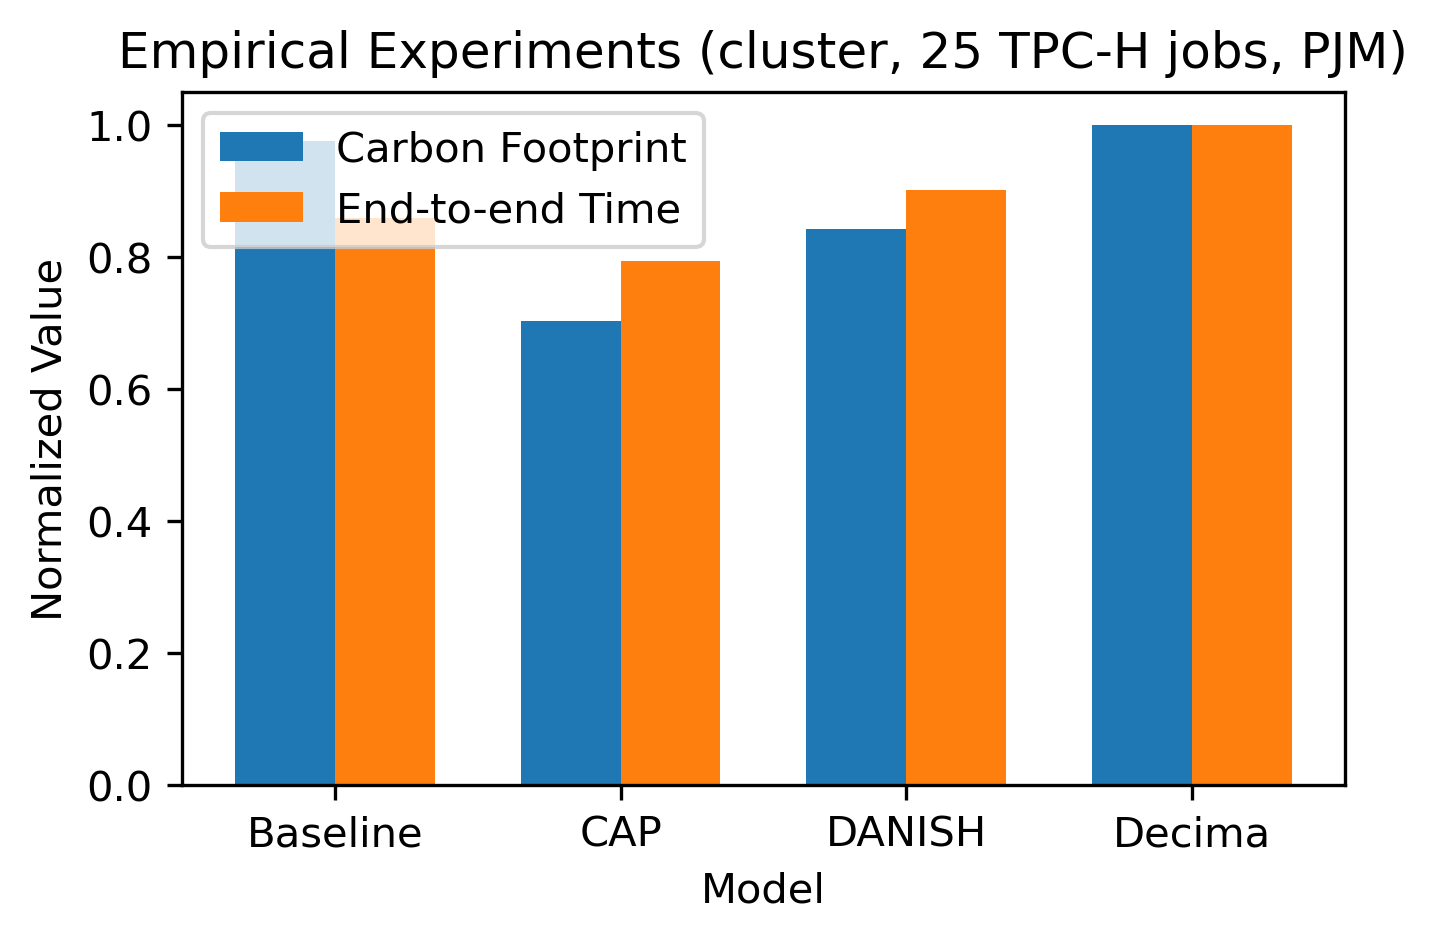

In [160]:
# plot the carbon footprint and completion time, normalized to the max of each
# bar plot in matplotlib
# make sure to label the axes and give a title
# save the plot as 'carbon_time_plot.png'

import matplotlib.pyplot as plt

carbon_data = [average_carbon_baseline, average_carbon_cap, average_carbon_danish, average_carbon_decima]
time_data = [average_time_baseline, average_time_cap, average_time_danish, average_time_decima]

carbon_data = [x / max(carbon_data) for x in carbon_data]
time_data = [x / max(time_data) for x in time_data]

fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
bar_width = 0.35
index = np.arange(4)

bar1 = ax.bar(index, carbon_data, bar_width, label='Carbon Footprint')
bar2 = ax.bar(index + bar_width, time_data, bar_width, label='End-to-end Time')
legend = ['Baseline', 'CAP', 'DANISH', 'Decima']
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Value')
ax.set_title(f'Empirical Experiments (cluster, {job_num} TPC-H jobs, {trace})')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(legend)
ax.legend()


In [161]:
# compute percentage improvement in carbon footprint
# CAP vs Baseline
improvement_cap = (average_carbon_baseline - average_carbon_cap) / average_carbon_baseline * 100
# DANISH vs Baseline
improvement_danish = (average_carbon_baseline - average_carbon_danish) / average_carbon_baseline * 100
# DANISH vs Decima
improvement_decima = (average_carbon_decima - average_carbon_danish) / average_carbon_decima * 100

# print the results
print('Improvement in Carbon Footprint for CAP vs Baseline:', improvement_cap)
print('Improvement in Carbon Footprint for DANISH vs Baseline:', improvement_danish)
print('Improvement in Carbon Footprint for DANISH vs Decima:', improvement_decima)

# compute percentage degradation in completion time
# CAP vs Baseline
# DANISH vs. Decima
degradation_cap = (average_time_cap - average_time_baseline) / average_time_baseline * 100
degradation_danish = (average_time_danish - average_time_decima) / average_time_decima * 100

# print the results
print('Degradation in Completion Time for CAP vs Baseline:', degradation_cap)
print('Degradation in Completion Time for DANISH vs Decima:', degradation_danish)

Improvement in Carbon Footprint for CAP vs Baseline: 27.94210533984941
Improvement in Carbon Footprint for DANISH vs Baseline: 13.725868483249837
Improvement in Carbon Footprint for DANISH vs Decima: 15.763604310001162
Degradation in Completion Time for CAP vs Baseline: -7.662690330553638
Degradation in Completion Time for DANISH vs Decima: -9.804991170144376
